   id_venda  data_venda             produto    categoria  valor_venda
0         1  2023-01-15      Smartphone XYZ  Eletrônicos        899.9
1         2  2023-02-20        Notebook ABC  Eletrônicos       1499.0
2         3  2023-03-10  Camiseta Estampada       Roupas         49.9
3         4  2023-04-05         Calça Jeans       Roupas         79.9
4         5  2023-05-30     Livro de Ficção       Livros         34.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venda     36 non-null     int64  
 1   data_venda   36 non-null     object 
 2   produto      36 non-null     object 
 3   categoria    36 non-null     object 
 4   valor_venda  36 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ KB
None


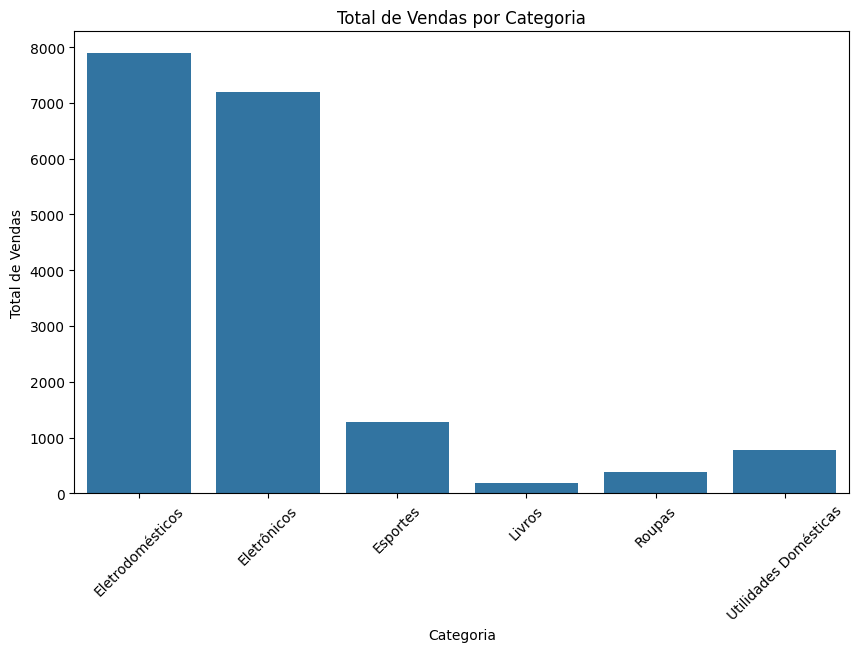

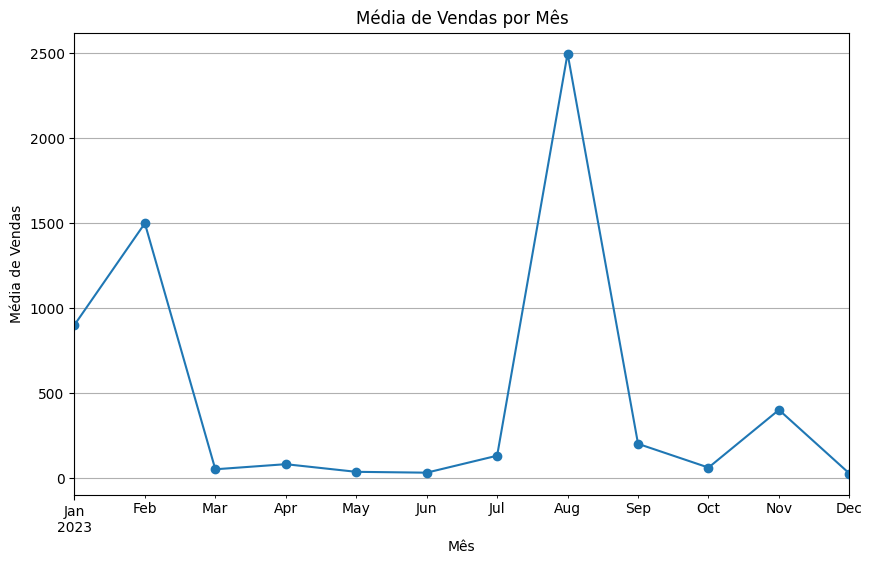

In [6]:
import sqlite3

# Passo 1.1: Conectar ao banco de dados (ou criar, se não existir)
conexao = sqlite3.connect('dados_vendas.db')

# Passo 1.2: Criar um cursor
cursor = conexao.cursor()

# Passo 1.3: Criar uma tabela (se não existir)
cursor.execute('''
CREATE TABLE IF NOT EXISTS vendas (
    id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
    data_venda DATE,
    produto TEXT,
    categoria TEXT,
    valor_venda REAL
)
''')

# Passo 1.4: Inserir alguns dados (Exemplo com produtos variados)
dados_vendas = [
    ('2023-01-15', 'Smartphone XYZ', 'Eletrônicos', 899.90),
    ('2023-02-20', 'Notebook ABC', 'Eletrônicos', 1499.00),
    ('2023-03-10', 'Camiseta Estampada', 'Roupas', 49.90),
    ('2023-04-05', 'Calça Jeans', 'Roupas', 79.90),
    ('2023-05-30', 'Livro de Ficção', 'Livros', 34.90),
    ('2023-06-12', 'Livro de Não-Ficção', 'Livros', 29.90),
    ('2023-07-08', 'Cafeteira Elétrica', 'Eletrodomésticos', 129.90),
    ('2023-08-22', 'Geladeira Frost Free', 'Eletrodomésticos', 2499.00),
    ('2023-09-18', 'Jogo de Panelas', 'Utilidades Domésticas', 199.90),
    ('2023-10-25', 'Conjunto de Talheres', 'Utilidades Domésticas', 59.90),
    ('2023-11-03', 'Bicicleta Aro 26', 'Esportes', 399.90),
    ('2023-12-19', 'Bola de Futebol', 'Esportes', 24.90)
]

cursor.executemany('''
INSERT INTO vendas (data_venda, produto, categoria, valor_venda)
VALUES (?, ?, ?, ?)
''', dados_vendas)

# Passo 1.5: Confirmar as mudanças
conexao.commit()
import pandas as pd

# Passo 2.1: Ler os dados do banco de dados para um DataFrame
query = "SELECT * FROM vendas"
df_vendas = pd.read_sql_query(query, conexao)

# Passo 2.2: Explorar os dados (opcional)
print(df_vendas.head())  # Visualizar as primeiras linhas
print(df_vendas.info())  # Verificar tipos de dados e informações sobre as colunas

# Passo 2.3: Converter a coluna 'data_venda' para o tipo datetime
df_vendas['data_venda'] = pd.to_datetime(df_vendas['data_venda'])
# Passo 3.1: Calcular o total de vendas por categoria
vendas_por_categoria = df_vendas.groupby('categoria')['valor_venda'].sum()

# Passo 3.2: Encontrar o produto mais vendido
produto_mais_vendido = df_vendas.groupby('produto')['valor_venda'].sum().idxmax()

# Passo 3.3: Calcular a média de vendas por mês
df_vendas['mes_venda'] = df_vendas['data_venda'].dt.to_period('M')
media_vendas_por_mes = df_vendas.groupby('mes_venda')['valor_venda'].mean()
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 4.1: Gráfico de barras para vendas por categoria
plt.figure(figsize=(10, 6))
sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values)
plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()

# Passo 4.2: Gráfico de linha para média de vendas por mês
plt.figure(figsize=(10, 6))
media_vendas_por_mes.plot(kind='line', marker='o')
plt.title('Média de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Vendas')
plt.grid(True)
plt.show()